INFO: Substituting symbol S from STIXNonUnicode
INFO: Substituting symbol S from STIXNonUnicode


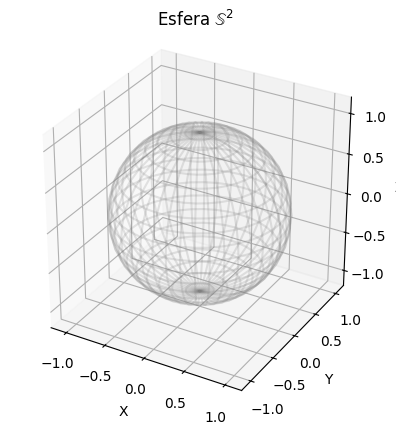

In [1]:
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.visualization import plot
import matplotlib.pyplot as plt

# Crear S^2: esfera 2D embebida en R^3
sphere = Hypersphere(dim=2)
points = sphere.random_uniform(n_samples=0)

# Visualizar
plot(points, space='S2', color='green', alpha=0.5)
plt.title("Esfera $\\mathbb{S}^2$")
plt.show()